RÉGRESSION (Concrete Compressive Strength)

1 : Importer les packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


2 : Charger le dataset

In [2]:
#LIEN: https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

In [3]:
from ucimlrepo import fetch_ucirepo

# Télécharger le dataset Concrete Compressive Strength (ID 165)
concrete = fetch_ucirepo(id=165)

# Séparer les données
X = concrete.data.features
y = concrete.data.targets


3 : Analyse des données

In [4]:
print(X.head())          # Aperçu des premières lignes
print(X.describe())      # Statistiques générales
print(X.isnull().sum())  # Vérifie s'il y a des valeurs manquantes


   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  
0            1040.0           676.0   28  
1            1055.0           676.0   28  
2             932.0           594.0  270  
3             932.0           594.0  365  
4             978.4           825.5  360  
            Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   

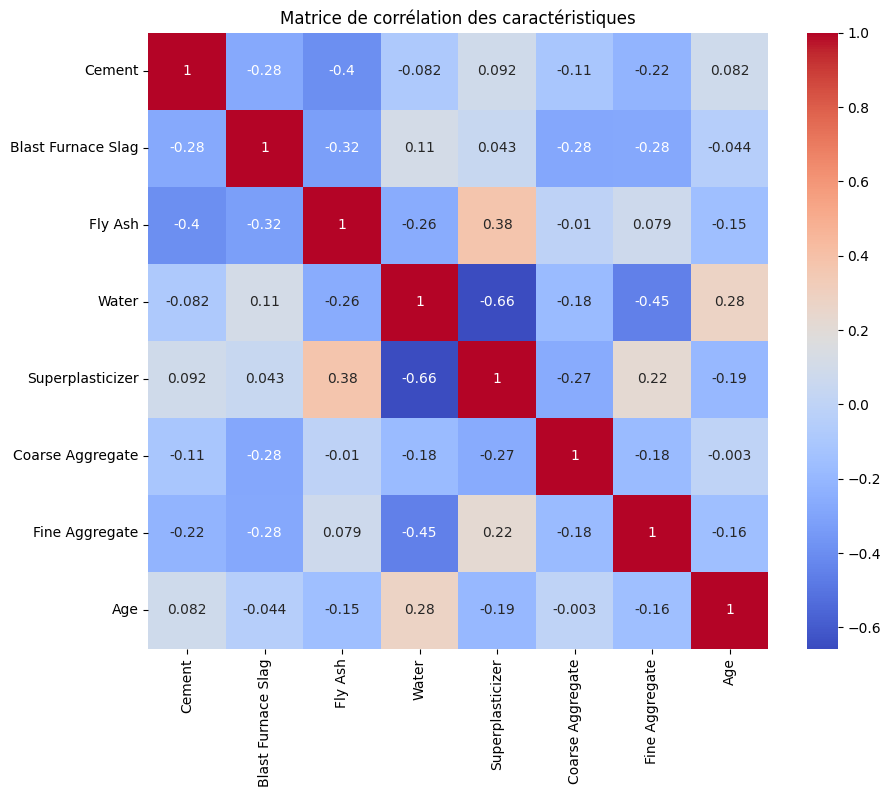

In [5]:
# Visualisation : corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des caractéristiques")
plt.show()

4 : Prétraitement des données

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


5 : Diviser les données en train/test

In [7]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


6 : Entraîner les modèles

In [8]:
lr = LinearRegression()
lr.fit(X_train_r, y_train_r)
y_pred_lr = lr.predict(X_test_r)

dt = DecisionTreeRegressor()
dt.fit(X_train_r, y_train_r)
y_pred_dt = dt.predict(X_test_r)

svr = SVR()
svr.fit(X_train_r, y_train_r)
y_pred_svr = svr.predict(X_test_r)

rf = RandomForestRegressor()
rf.fit(X_train_r, y_train_r)
y_pred_rf = rf.predict(X_test_r)


C:\Users\DANH\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DANH\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Définir le modèle
model_r = Sequential()
model_r.add(Dense(128, input_dim=X_train_r.shape[1], activation='relu'))
model_r.add(Dense(64, activation='relu'))
model_r.add(Dense(1))  # Sortie pour régression

# 2. Compiler le modèle
model_r.compile(optimizer='adam', loss='mean_squared_error')

# 3. Entraîner le modèle (c’est ici que 'history_r' est défini)
history_r = model_r.fit(
    X_train_r, y_train_r,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


C:\Users\DANH\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1436.3093 - val_loss: 1135.0250
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 943.3692 - val_loss: 405.0232
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 312.0460 - val_loss: 177.4458
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 226.8868 - val_loss: 164.4958
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 197.1310 - val_loss: 153.7386
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 182.3255 - val_loss: 151.1313
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 173.0807 - val_loss: 142.8867
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 144.5044 - val_loss: 135.8780
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 146.7749 - val_loss: 133.5689
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 145.6182 - val_loss: 134.1884
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 141.9874 - val_loss: 128.7798
Epoch 12/100
42

7 : Visualiser l’évolution du NN

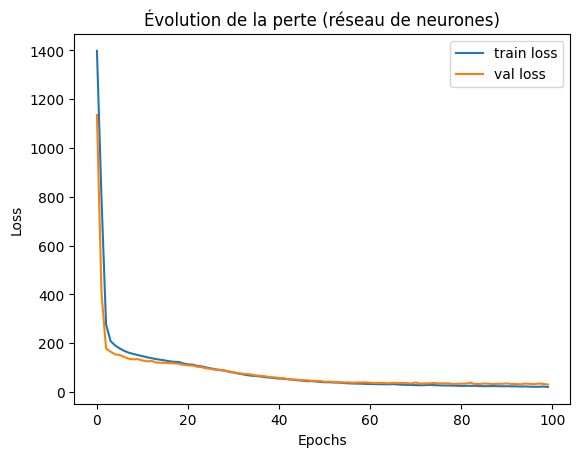

In [14]:
plt.plot(history_r.history['loss'], label='train loss')
plt.plot(history_r.history['val_loss'], label='val loss')
plt.title("Évolution de la perte (réseau de neurones)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


 8 : Évaluer les modèles

In [15]:
def eval_regression_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{name} → R²: {r2:.4f} | MSE: {mse:.4f}")

eval_regression_model("Linear Regression", y_test_r, y_pred_lr)
eval_regression_model("Decision Tree", y_test_r, y_pred_dt)
eval_regression_model("SVR", y_test_r, y_pred_svr)
eval_regression_model("Random Forest", y_test_r, y_pred_rf)

Linear Regression → R²: 0.6276 | MSE: 95.9709
Decision Tree → R²: 0.8342 | MSE: 42.7349
SVR → R²: 0.6480 | MSE: 90.7118
Random Forest → R²: 0.8801 | MSE: 30.8994
